# 5. GDP and HIV cases and AIDS deaths analysis
In this notebook an analysis has been performed to analyse if the GDP of the country affects in the HIV active cases and AIDS related deaths.

In [91]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.optimize as op

In [2]:
df = pd.read_csv('AIDS_GDP_CLEANED.csv')
df.head()

,year,country_name,country_code,continent,sub_region,population,deathrate,gdp_per_capita,active_HIV_cases_children,active_HIV_cases_male_adults,active_HIV_cases_female_adults,AIDS_deaths_children,AIDS_deaths_male_adults,AIDS_deaths_female_adults
0,2010,Afghanistan,AFG,Asia,Southern Asia,29185507,8.25,543.3030,500,2800,1200,100,200,100
1,2010,Albania,ALB,Europe,Southern Europe,2913021,6.84,4094.3621,1650,6150,9550,200,200,500
2,2010,Algeria,DZA,Africa,Northern Africa,35977455,4.66,4480.7245,200,4000,2900,100,100,100
3,2010,American Samoa,ASM,Oceania,Polynesia,56079,8.20,10271.2245,1650,6150,9550,200,200,500
4,2010,Andorra,AND,Europe,Southern Europe,84449,2.80,39736.3541,1650,6150,9550,200,200,500


### 1. Group data per country

In [8]:
df_grouped = df.groupby(['country_name','country_code','continent','sub_region'],as_index=False).mean()
df_grouped = df_grouped.drop(['year'], axis=1)
df_grouped

,country_name,country_code,continent,sub_region,population,deathrate,gdp_per_capita,active_HIV_cases_children,active_HIV_cases_male_adults,active_HIV_cases_female_adults,AIDS_deaths_children,AIDS_deaths_male_adults,AIDS_deaths_female_adults
0,Afghanistan,AFG,Asia,Southern Asia,3.326336e+07,7.422222,581.139089,500.000000,3800.000000,1544.444444,100.000000,300.000000,100.000000
1,Albania,ALB,Europe,Southern Europe,2.888828e+06,7.233333,4405.508889,1516.666667,6277.777778,9694.444444,200.000000,200.000000,500.000000
2,Algeria,DZA,Africa,Northern Africa,3.899818e+07,4.998889,4756.077933,433.333333,6077.777778,4922.222222,100.000000,100.000000,100.000000
3,American Samoa,ASM,Oceania,Polynesia,5.573856e+04,7.442222,11219.707567,1522.222222,6272.222222,9688.888889,200.000000,200.000000,500.000000
4,Andorra,AND,Europe,Southern Europe,7.999167e+04,6.398889,39620.559122,1511.111111,6277.777778,9683.333333,200.000000,200.000000,500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Virgin Islands (U.S.),VIR,Americas,Caribbean,1.078038e+05,7.112222,34856.730811,1516.666667,6277.777778,9694.444444,200.000000,200.000000,500.000000
211,West Bank and Gaza,PSE,Asia,Western Asia,4.173369e+06,3.930000,2942.885667,1500.000000,6283.333333,9694.444444,200.000000,200.000000,500.000000
212,"Yemen, Rep.",YEM,Asia,Western Asia,2.582287e+07,6.177778,8658.526978,1505.555556,6283.333333,9694.444444,200.000000,200.000000,500.000000
213,Zambia,ZMB,Africa,Eastern Africa,1.542988e+07,7.912222,1584.511456,70333.333333,431111.111111,620000.000000,4266.666667,7611.111111,8200.000000


### 2. Divide the countries into RICH, or POOR

In [44]:
bins = np.array([min(df_grouped['gdp_per_capita']), np.mean(df_grouped["gdp_per_capita"]), max(df_grouped["gdp_per_capita"])])
group_names = ['Poor','Rich']
df_grouped['country_category'] = pd.cut(df['gdp_per_capita'], bins, labels=group_names, include_lowest=True )
df_grouped.head(5)

,country_name,country_code,continent,sub_region,population,deathrate,gdp_per_capita,active_HIV_cases_children,active_HIV_cases_male_adults,active_HIV_cases_female_adults,AIDS_deaths_children,AIDS_deaths_male_adults,AIDS_deaths_female_adults,country_category
0,Afghanistan,AFG,Asia,Southern Asia,3.326336e+07,7.422222,581.139089,500.000000,3800.000000,1544.444444,100.0,300.0,100.0,Poor
1,Albania,ALB,Europe,Southern Europe,2.888828e+06,7.233333,4405.508889,1516.666667,6277.777778,9694.444444,200.0,200.0,500.0,Poor
2,Algeria,DZA,Africa,Northern Africa,3.899818e+07,4.998889,4756.077933,433.333333,6077.777778,4922.222222,100.0,100.0,100.0,Poor
3,American Samoa,ASM,Oceania,Polynesia,5.573856e+04,7.442222,11219.707567,1522.222222,6272.222222,9688.888889,200.0,200.0,500.0,Poor
4,Andorra,AND,Europe,Southern Europe,7.999167e+04,6.398889,39620.559122,1511.111111,6277.777778,9683.333333,200.0,200.0,500.0,Rich


Text(0, 0.5, 'count')

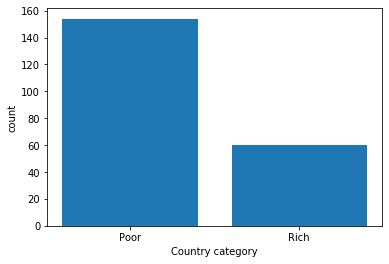

In [45]:
plt.bar(group_names, df_grouped['country_category'].value_counts())

# set x/y labels and plot title
plt.xlabel("Country category")
plt.ylabel("count")

In [46]:
df_poor_countries = df_grouped[df_grouped['country_category'] == 'Poor']
df_poor_countries

,country_name,country_code,continent,sub_region,population,deathrate,gdp_per_capita,active_HIV_cases_children,active_HIV_cases_male_adults,active_HIV_cases_female_adults,AIDS_deaths_children,AIDS_deaths_male_adults,AIDS_deaths_female_adults,country_category
0,Afghanistan,AFG,Asia,Southern Asia,3.326336e+07,7.422222,581.139089,500.000000,3800.000000,1544.444444,100.000000,300.000000,100.000000,Poor
1,Albania,ALB,Europe,Southern Europe,2.888828e+06,7.233333,4405.508889,1516.666667,6277.777778,9694.444444,200.000000,200.000000,500.000000,Poor
2,Algeria,DZA,Africa,Northern Africa,3.899818e+07,4.998889,4756.077933,433.333333,6077.777778,4922.222222,100.000000,100.000000,100.000000,Poor
3,American Samoa,ASM,Oceania,Polynesia,5.573856e+04,7.442222,11219.707567,1522.222222,6272.222222,9688.888889,200.000000,200.000000,500.000000,Poor
5,Angola,AGO,Africa,Middle Africa,2.699953e+07,9.237778,4351.999067,33555.555556,75777.777778,168888.888889,4488.888889,2144.444444,4477.777778,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,"Venezuela, RB",VEN,Americas,South America,2.941201e+07,6.278889,7154.361589,1511.111111,6283.333333,9694.444444,200.000000,200.000000,500.000000,Poor
209,Vietnam,VNM,Asia,South-Eastern Asia,9.172918e+07,6.182222,1967.179611,1511.111111,6283.333333,9694.444444,200.000000,200.000000,500.000000,Poor
211,West Bank and Gaza,PSE,Asia,Western Asia,4.173369e+06,3.930000,2942.885667,1500.000000,6283.333333,9694.444444,200.000000,200.000000,500.000000,Poor
213,Zambia,ZMB,Africa,Eastern Africa,1.542988e+07,7.912222,1584.511456,70333.333333,431111.111111,620000.000000,4266.666667,7611.111111,8200.000000,Poor


In [47]:
continents = df_poor_countries['continent'].unique()
for continent in continents :
    num = len(df_poor_countries[df_poor_countries['continent'] == continent])
    print(continent)
    print(num)
    print('-------------------------------------------------------------------')

Asia
37
-------------------------------------------------------------------
Europe
18
-------------------------------------------------------------------
Africa
51
-------------------------------------------------------------------
Oceania
16
-------------------------------------------------------------------
Americas
32
-------------------------------------------------------------------


In [48]:
df_rich_countries = df_grouped[df_grouped['country_category'] == 'Rich']
df_rich_countries

,country_name,country_code,continent,sub_region,population,deathrate,gdp_per_capita,active_HIV_cases_children,active_HIV_cases_male_adults,active_HIV_cases_female_adults,AIDS_deaths_children,AIDS_deaths_male_adults,AIDS_deaths_female_adults,country_category
4,Andorra,AND,Europe,Southern Europe,7.999167e+04,6.398889,39620.559122,1511.111111,6277.777778,9683.333333,200.000000,200.000000,500.000000,Rich
9,Aruba,ABW,Americas,Caribbean,1.037369e+05,8.303333,24097.913567,1533.333333,6255.555556,9666.666667,200.000000,200.000000,500.000000,Rich
10,Australia,AUS,Oceania,Australia and New Zealand,2.347891e+07,6.645556,59042.224067,100.000000,21333.333333,2777.777778,100.000000,200.000000,100.000000,Rich
11,Austria,AUT,Europe,Western Europe,8.581687e+06,9.112222,48616.037722,1533.333333,6255.555556,9666.666667,200.000000,200.000000,500.000000,Rich
13,"Bahamas, The",BHS,Americas,Caribbean,3.706047e+05,6.734444,11089.301800,1511.111111,6283.333333,9694.444444,200.000000,200.000000,500.000000,Rich
14,Bahrain,BHR,Asia,Western Asia,1.370135e+06,2.904444,23299.869611,1466.666667,6311.111111,9722.222222,200.000000,200.000000,500.000000,Rich
18,Belgium,BEL,Europe,Western Europe,1.120134e+07,9.367778,45038.980878,1533.333333,6255.555556,9666.666667,200.000000,200.000000,500.000000,Rich
21,Bermuda,BMU,Americas,Northern America,6.469578e+04,7.267778,85795.097633,1516.666667,6277.777778,9694.444444,200.000000,200.000000,500.000000,Rich
27,British Virgin Islands,VGB,Americas,Caribbean,2.894278e+04,7.840000,66693.299800,1522.222222,6272.222222,9688.888889,200.000000,200.000000,500.000000,Rich
28,Brunei Darussalam,BRN,Asia,South-Eastern Asia,4.092950e+05,4.434444,37228.558967,1500.000000,6283.333333,9694.444444,200.000000,200.000000,500.000000,Rich


In [49]:
continents = df_rich_countries['continent'].unique()
for continent in continents :
    num = len(df_rich_countries[df_rich_countries['continent'] == continent])
    print(continent)
    print(num)
    print('-------------------------------------------------------------------')

Europe
28
-------------------------------------------------------------------
Americas
14
-------------------------------------------------------------------
Oceania
3
-------------------------------------------------------------------
Asia
13
-------------------------------------------------------------------
Africa
2
-------------------------------------------------------------------


### 3. Compare the HIV cases between rich and poor countries

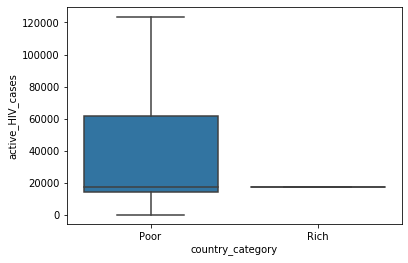

In [52]:
#boxplots
df_grouped['active_HIV_cases'] = df_grouped['active_HIV_cases_children'] + df_grouped['active_HIV_cases_male_adults'] + df_grouped['active_HIV_cases_female_adults']
sns.boxplot(x='country_category', y="active_HIV_cases", data=df_grouped, showfliers = False)

In [60]:
cases_poor = df_grouped['active_HIV_cases'][df_grouped['country_category'] == 'Poor'].values
cases_rich = df_grouped['active_HIV_cases'][df_grouped['country_category'] == 'Rich'].values
print('Variance of Poor countries: ', np.var(cases_poor))
print('Variance of Rich countries: ', np.var(cases_rich))

Variance of Poor countries:  397332390833.08484
Variance of Rich countries:  832822070.9533609


In [74]:
#perform a t-test to compare the mean values
_, p_value = stats.ttest_ind(cases_poor, cases_rich, equal_var=False)
if np.mean(cases_poor) > np.mean(cases_rich):
    p_value = p_value/2
else:
    p_value = 1.0 - p_value/2
print('p_value of the test: ', p_value)
if p_value < 0.05 :
    print('Active HIV cases mean is higher in the poor countries')
else :
    print('Active HIV cases mean is lower in the poor countries')

p_value of the test:  0.003186527606646224
Active HIV cases mean is higher in the poor countries


### 4. AIDS related deaths between rich and poor countries

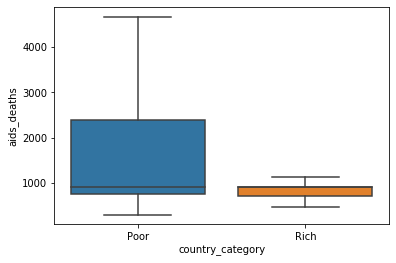

In [75]:
#boxplots
df_grouped['aids_deaths'] = df_grouped['AIDS_deaths_children'] + df_grouped['AIDS_deaths_male_adults'] + df_grouped['AIDS_deaths_female_adults']
sns.boxplot(x='country_category', y="aids_deaths", data=df_grouped, showfliers = False)

In [76]:
deaths_poor = df_grouped['aids_deaths'][df_grouped['country_category'] == 'Poor'].values
deaths_rich = df_grouped['aids_deaths'][df_grouped['country_category'] == 'Rich'].values
print('Variance of Poor countries: ', np.var(deaths_poor))
print('Variance of Rich countries: ', np.var(deaths_rich))

Variance of Poor countries:  134328004.72905722
Variance of Rich countries:  55382.81035665295


In [77]:
#perform a t-test to compare the mean values
_, p_value = stats.ttest_ind(deaths_poor, deaths_rich, equal_var=False)
if np.mean(deaths_poor) > np.mean(deaths_rich):
    p_value = p_value/2
else:
    p_value = 1.0 - p_value/2
print('p_value of the test: ', p_value)
if p_value < 0.05 :
    print('AIDS related deaths mean is higher in the poor countries')
else :
    print('AIDS related deaths mean is lower in the poor countries')

p_value of the test:  6.243918588367387e-05
AIDS related deaths mean is higher in the poor countries


### 5. Correlation between GDP and active cases

In [81]:
df_grouped[['gdp_per_capita','active_HIV_cases']].corr(method='pearson')

,gdp_per_capita,active_HIV_cases
gdp_per_capita,1.000000,-0.107558
active_HIV_cases,-0.107558,1.000000


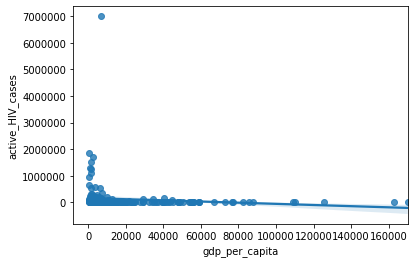

In [83]:
sns.regplot(x='gdp_per_capita', y='active_HIV_cases', data=df_grouped)

There is not a high linear correlation between GDP per capita and the number of HIV active cases. But the correlation is negative, higher is the GDP, the lower is the number of active HIV cases.

It seems like there is a light negative exponential correlation.

In [89]:
log_x_data = np.log(df_grouped['gdp_per_capita'].values)
log_y_data = np.log(df_grouped['active_HIV_cases'].values)

curve_fit = np.polyfit(log_x_data, log_y_data, 1)
print(curve_fit)

[-0.34343667 13.1220926 ]


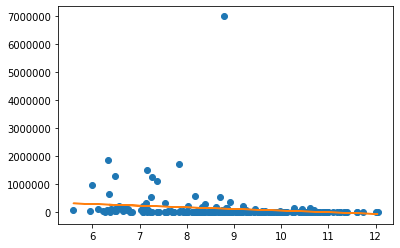

In [90]:
y = -58387.80643245 * log_x_data + 643560.30141345
plt.plot(log_x_data, df_grouped['active_HIV_cases'], "o")
plt.plot(log_x_data, y)

### 6. Correlation between GDP and AIDS related deaths

In [93]:
df_grouped[['gdp_per_capita','aids_deaths']].corr(method='pearson')

,gdp_per_capita,aids_deaths
gdp_per_capita,1.000000,-0.155115
aids_deaths,-0.155115,1.000000


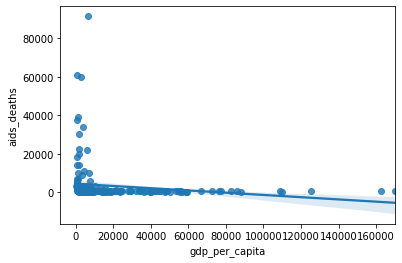

In [94]:
sns.regplot(x='gdp_per_capita', y='aids_deaths', data=df_grouped)

There is not a high linear correlation between GDP per capita and the number of HIV active cases. But the correlation is negative, higher is the GDP, the lower is the number of active HIV cases.

It seems like there is a light negative exponential correlation.

In [95]:
log_x_data = np.log(df_grouped['gdp_per_capita'].values)
log_y_data = np.log(df_grouped['aids_deaths'].values)

curve_fit = np.polyfit(log_x_data, log_y_data, 1)
print(curve_fit)

[-0.34711516 10.14083351]


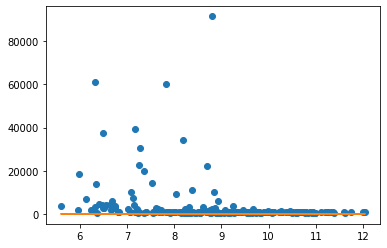

In [96]:
y = -0.34711516 * log_x_data + 10.14083351
plt.plot(log_x_data, df_grouped['aids_deaths'], "o")
plt.plot(log_x_data, y)

### 7. Correlation between GDP and AIDS related deaths

In [97]:
df_grouped[['active_HIV_cases','aids_deaths']].corr(method='pearson')

,active_HIV_cases,aids_deaths
active_HIV_cases,1.000000,0.900164
aids_deaths,0.900164,1.000000


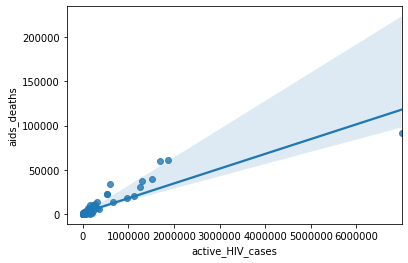

In [98]:
sns.regplot(x='active_HIV_cases', y='aids_deaths', data=df_grouped)